# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac\n1-240522-072114"
behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac_csvs\n1-240522-072114.csv"
cup_assignment_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\Social_Pref_sheet.csv"
# single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n5-240821-085040"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

# tdt2 = tdt.read_block(single_recording_path2)
# tdt_data_2 = TDTData(tdt2, single_recording_path2)

tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac\n1-240522-072114\Notes.txt
read from t=0s to t=794.67s


In [4]:
tdt_data_obj.sp_extract_intruder_events(behavior_csv_path=behavior_csv_path,cup_assignment_csv_path=cup_assignment_csv_path)

In [5]:
tdt_data_obj.remove_initial_LED_artifact(t=30)
tdt_data_obj.sp_remove_time_around_subject_introduced(buffer_time=5)

tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*2)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels()
tdt_data_obj.compute_dFF()
tdt_data_obj.compute_zscore()

Removed time segment from 183.2s to 188.2s.
Removed 5 seconds before and after 'subject introduced' at 188.2s.


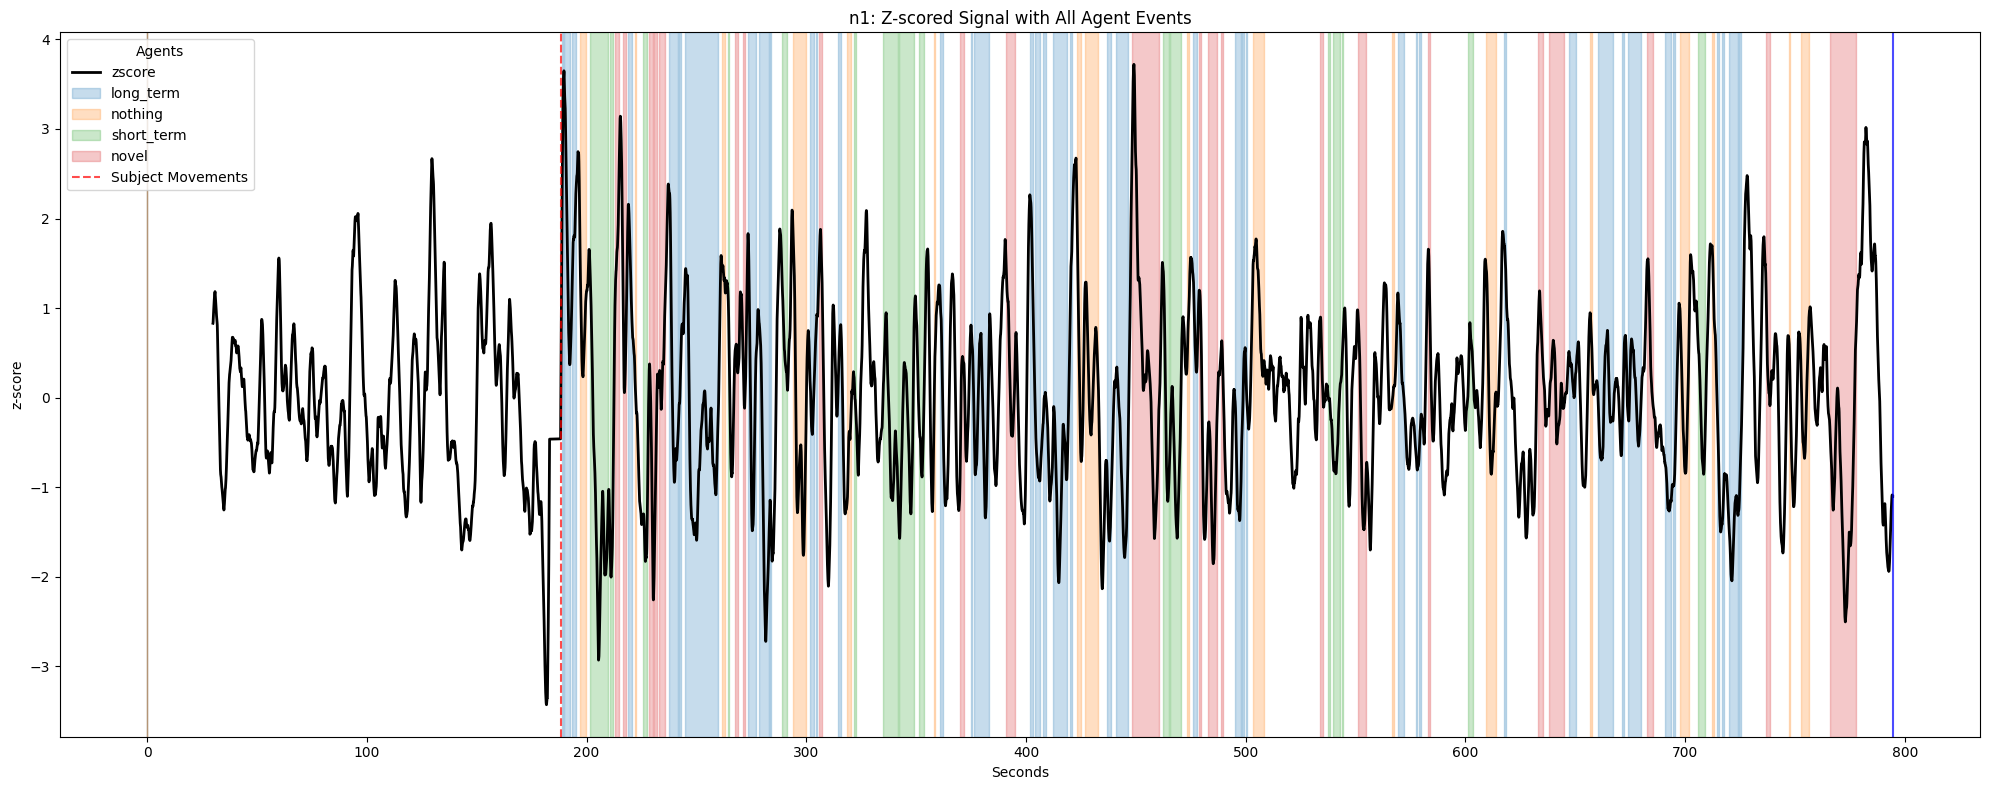

In [6]:
tdt_data_obj.sp_plot_behavior_event(plot_type='zscore')

In [7]:
agents = ['long_term', 'short_term', 'novel', 'nothing']

df_total_durations = tdt_data_obj.sp_extract_total_behavior_durations(agents, behaviors=['sniff', 'chew'])

print(df_total_durations)

              sniff  chew  Total Investigation Time
Agent                                              
long_term   104.734     0                   104.734
short_term   48.600     0                    48.600
novel        68.534     0                    68.534
nothing      42.867     0                    42.867


## Plot Raw Trace

In [8]:
len(tdt_data_obj.streams['DA'])

772588

In [9]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

772588

In [10]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

742070

In [11]:
tdt_data_obj.remove_time_segment(90,130)

Removed time segment from 90s to 130s.


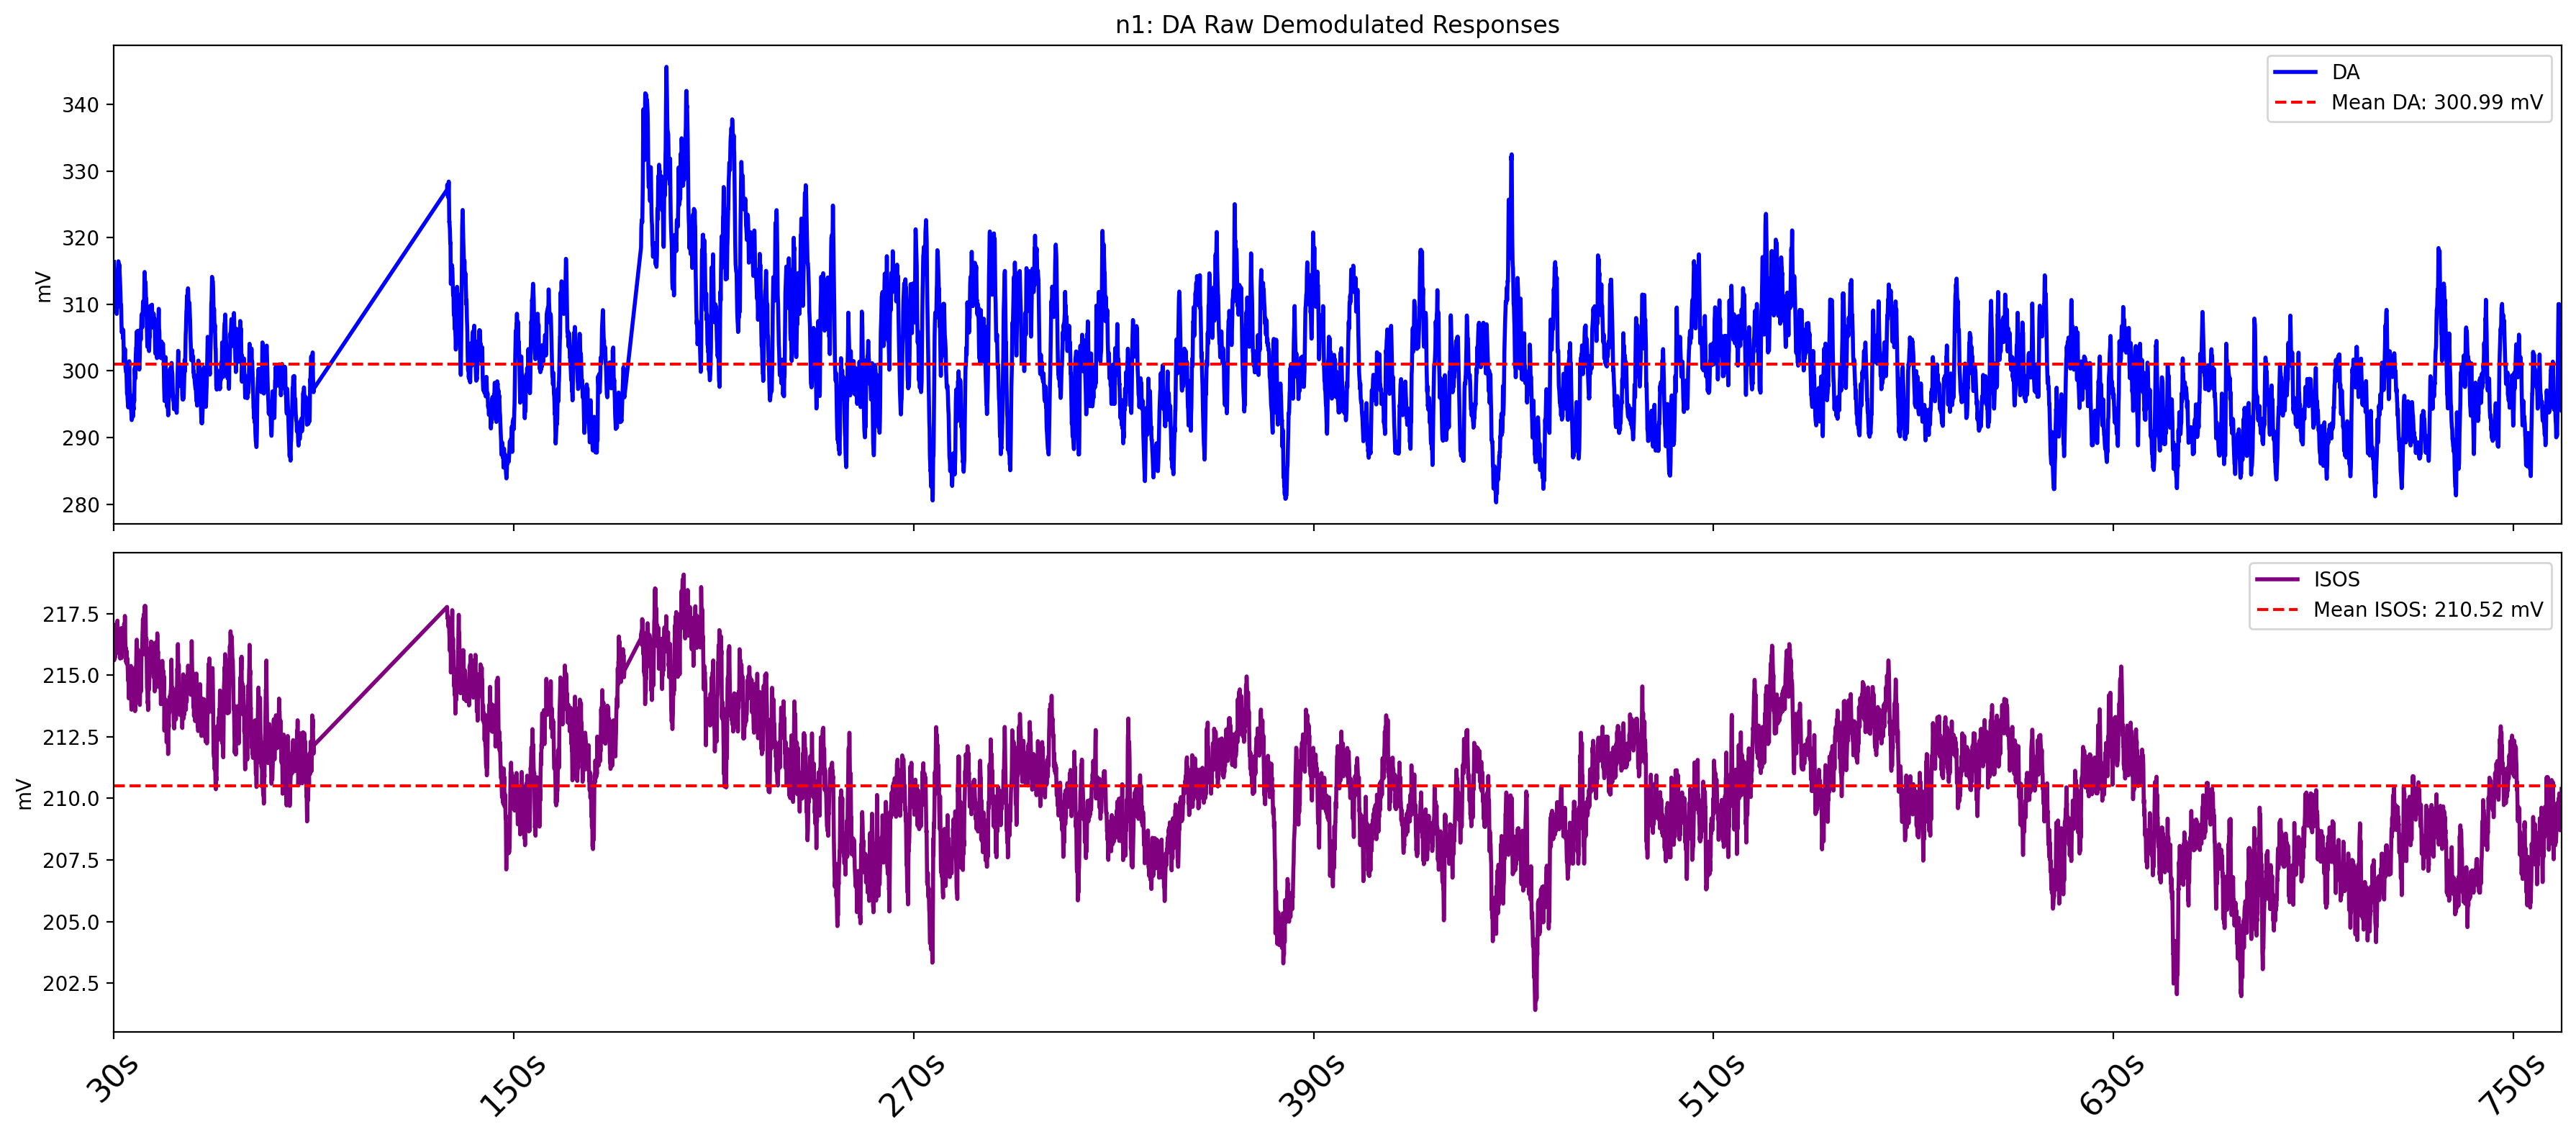

In [12]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [13]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*2)

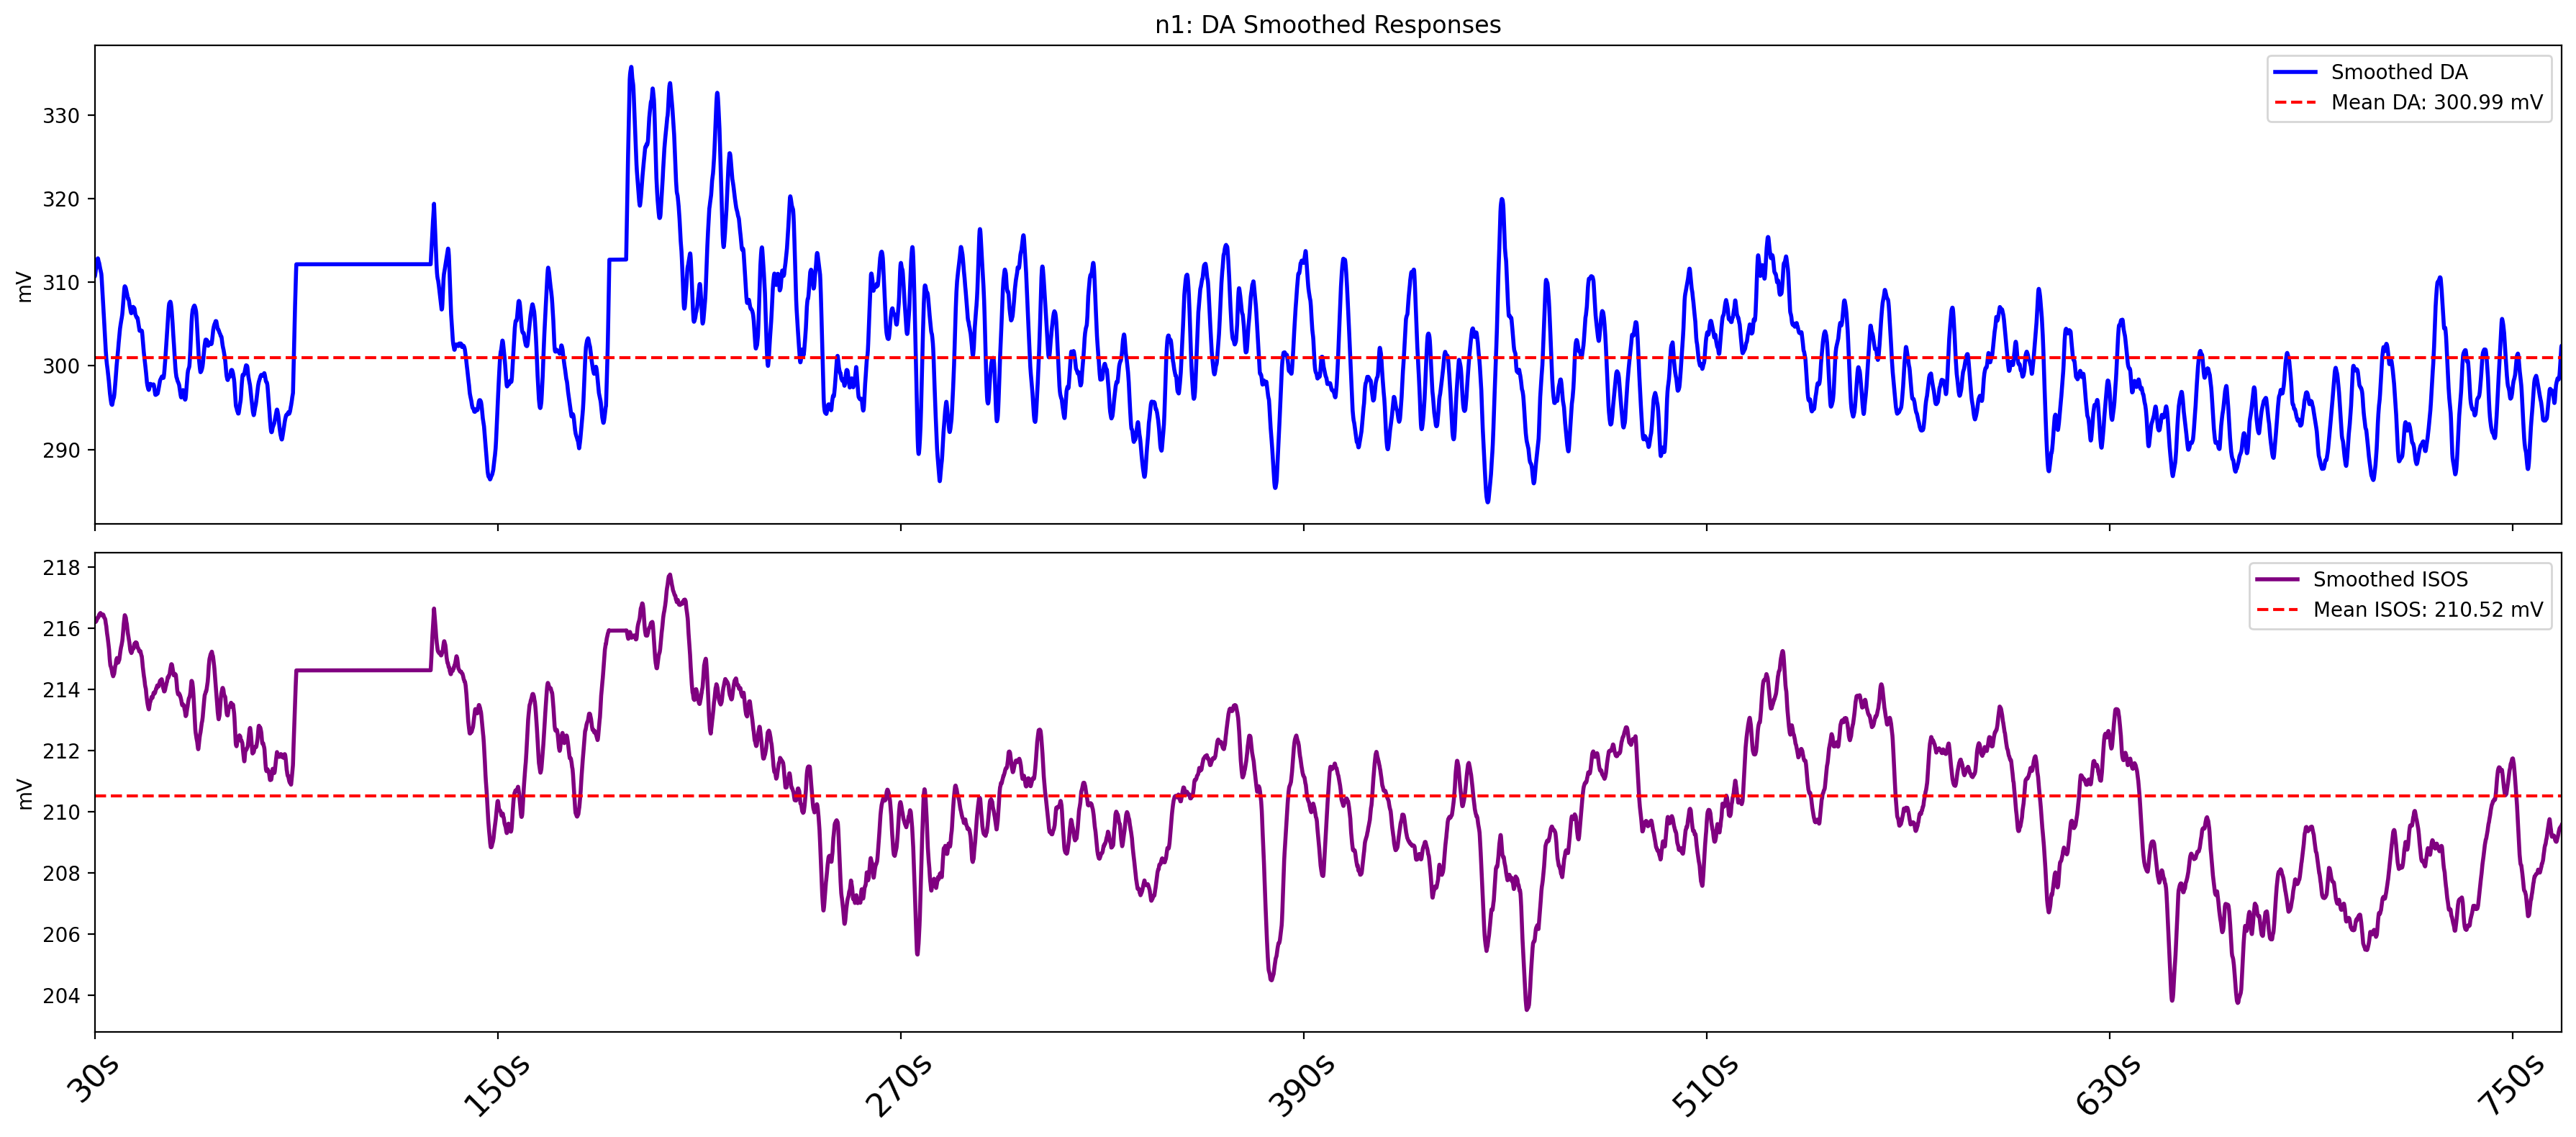

In [14]:
tdt_data_obj.plot_signal('smoothed')

In [15]:
# tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.apply_ma_baseline_correction()

In [16]:
tdt_data_obj.DA_fc

array([304.76902158, 304.76902133, 304.76902083, ..., 296.03382058,
       296.03382064, 296.03382064])

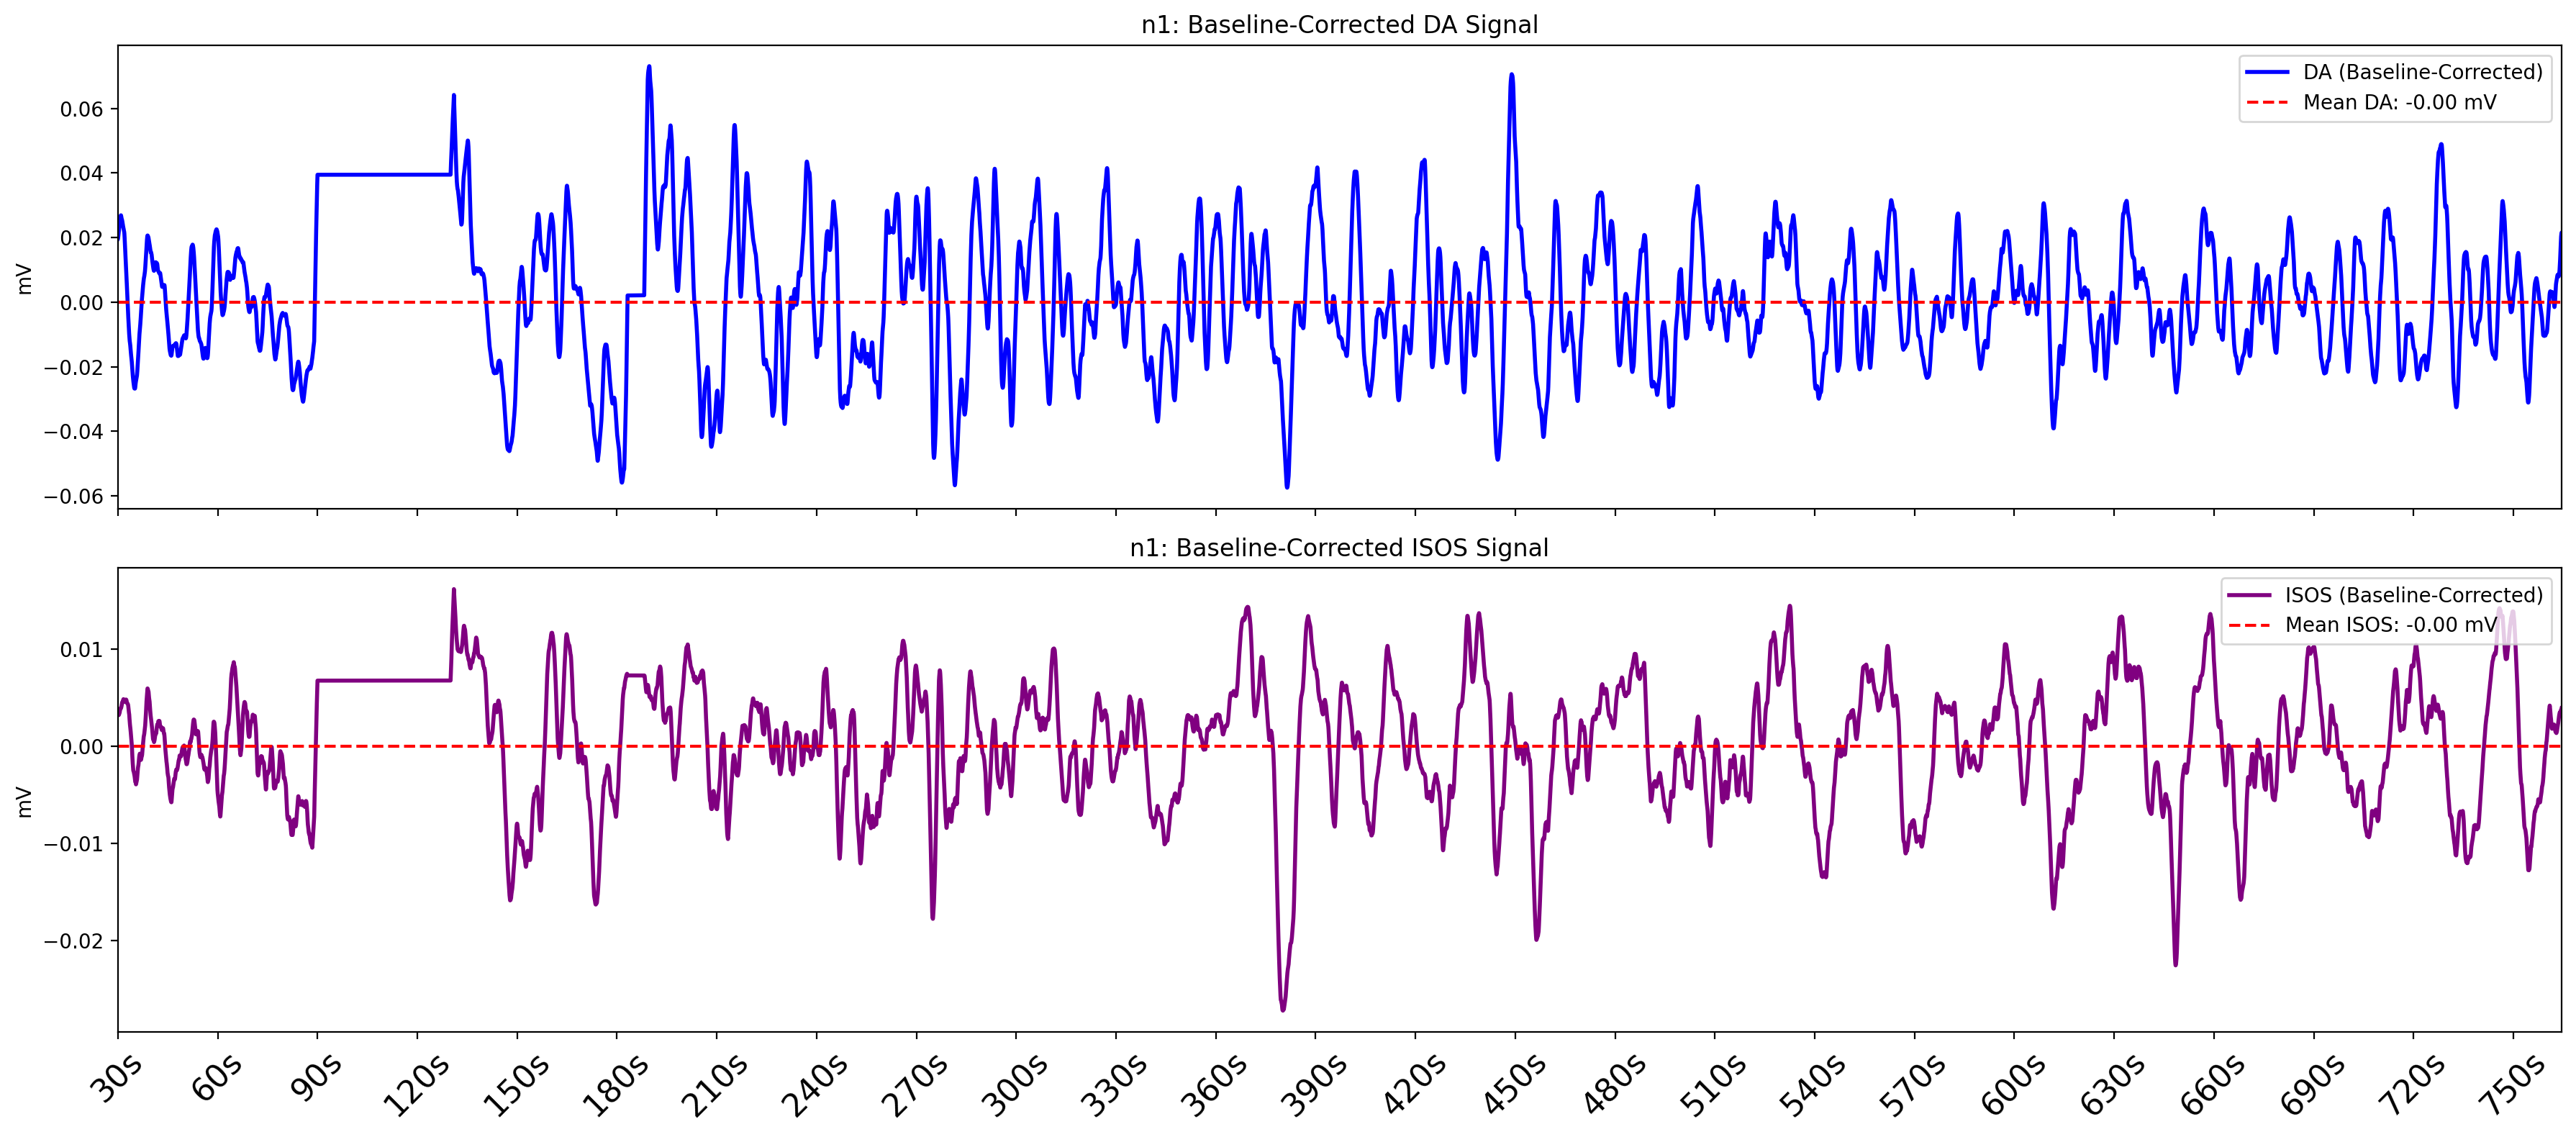

In [17]:
tdt_data_obj.plot_baseline_corrected_signal()

In [18]:
tdt_data_obj.perform_standardization()

In [19]:
tdt_data_obj.align_channels()

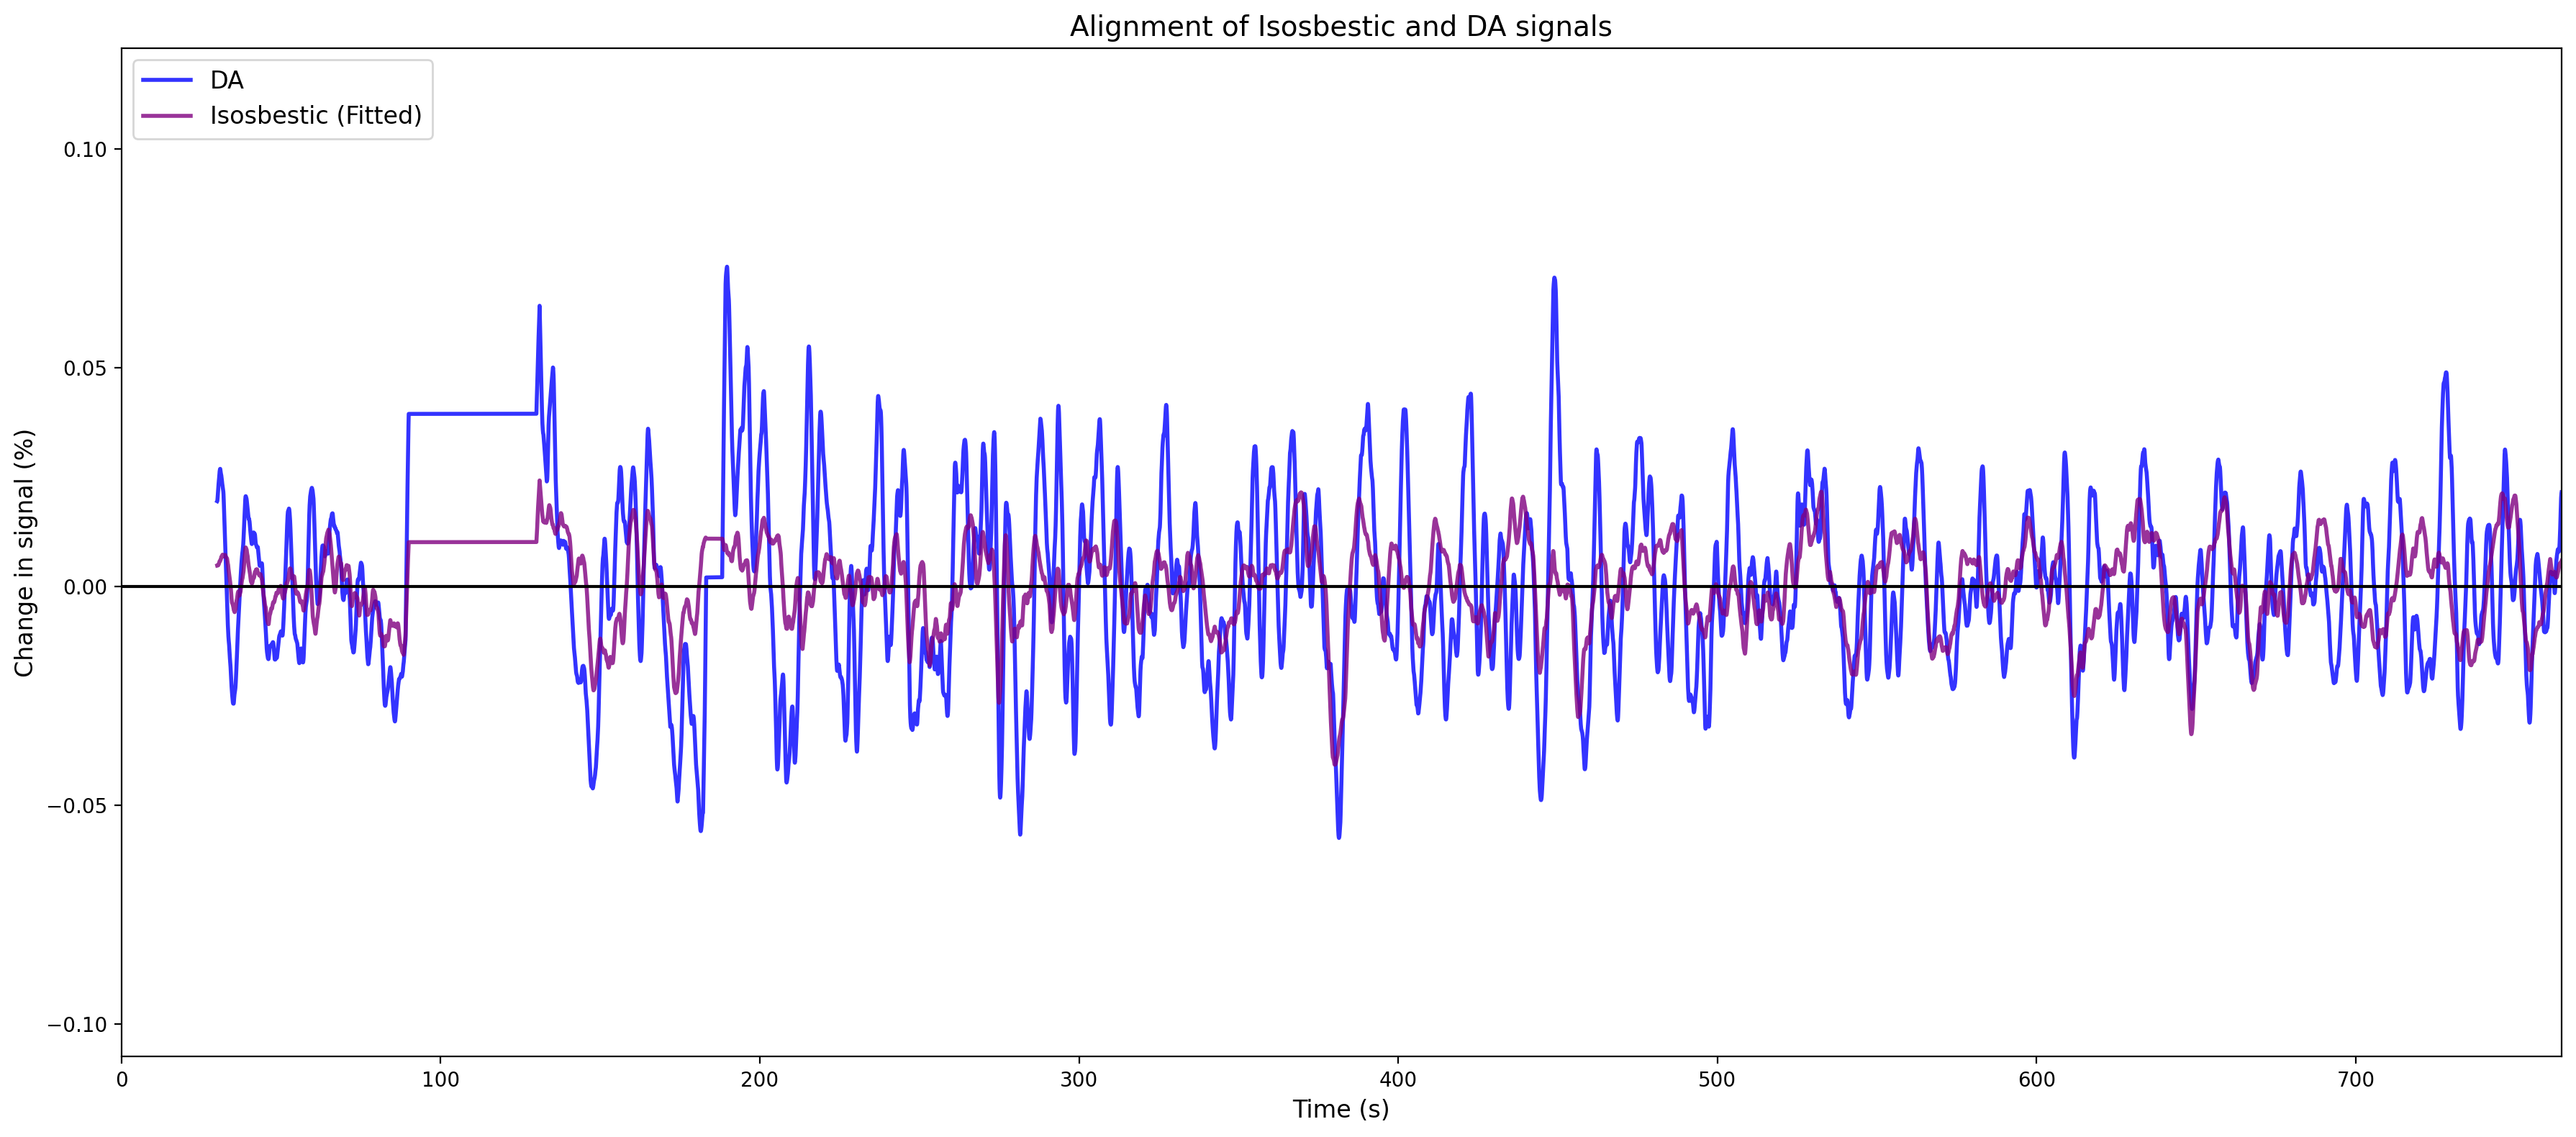

In [20]:
tdt_data_obj.plot_aligned_signals()

In [21]:
tdt_data_obj.compute_dFF()

array([0.01471062, 0.01471079, 0.01471112, ..., 0.01566585, 0.01566597,
       0.01566597])

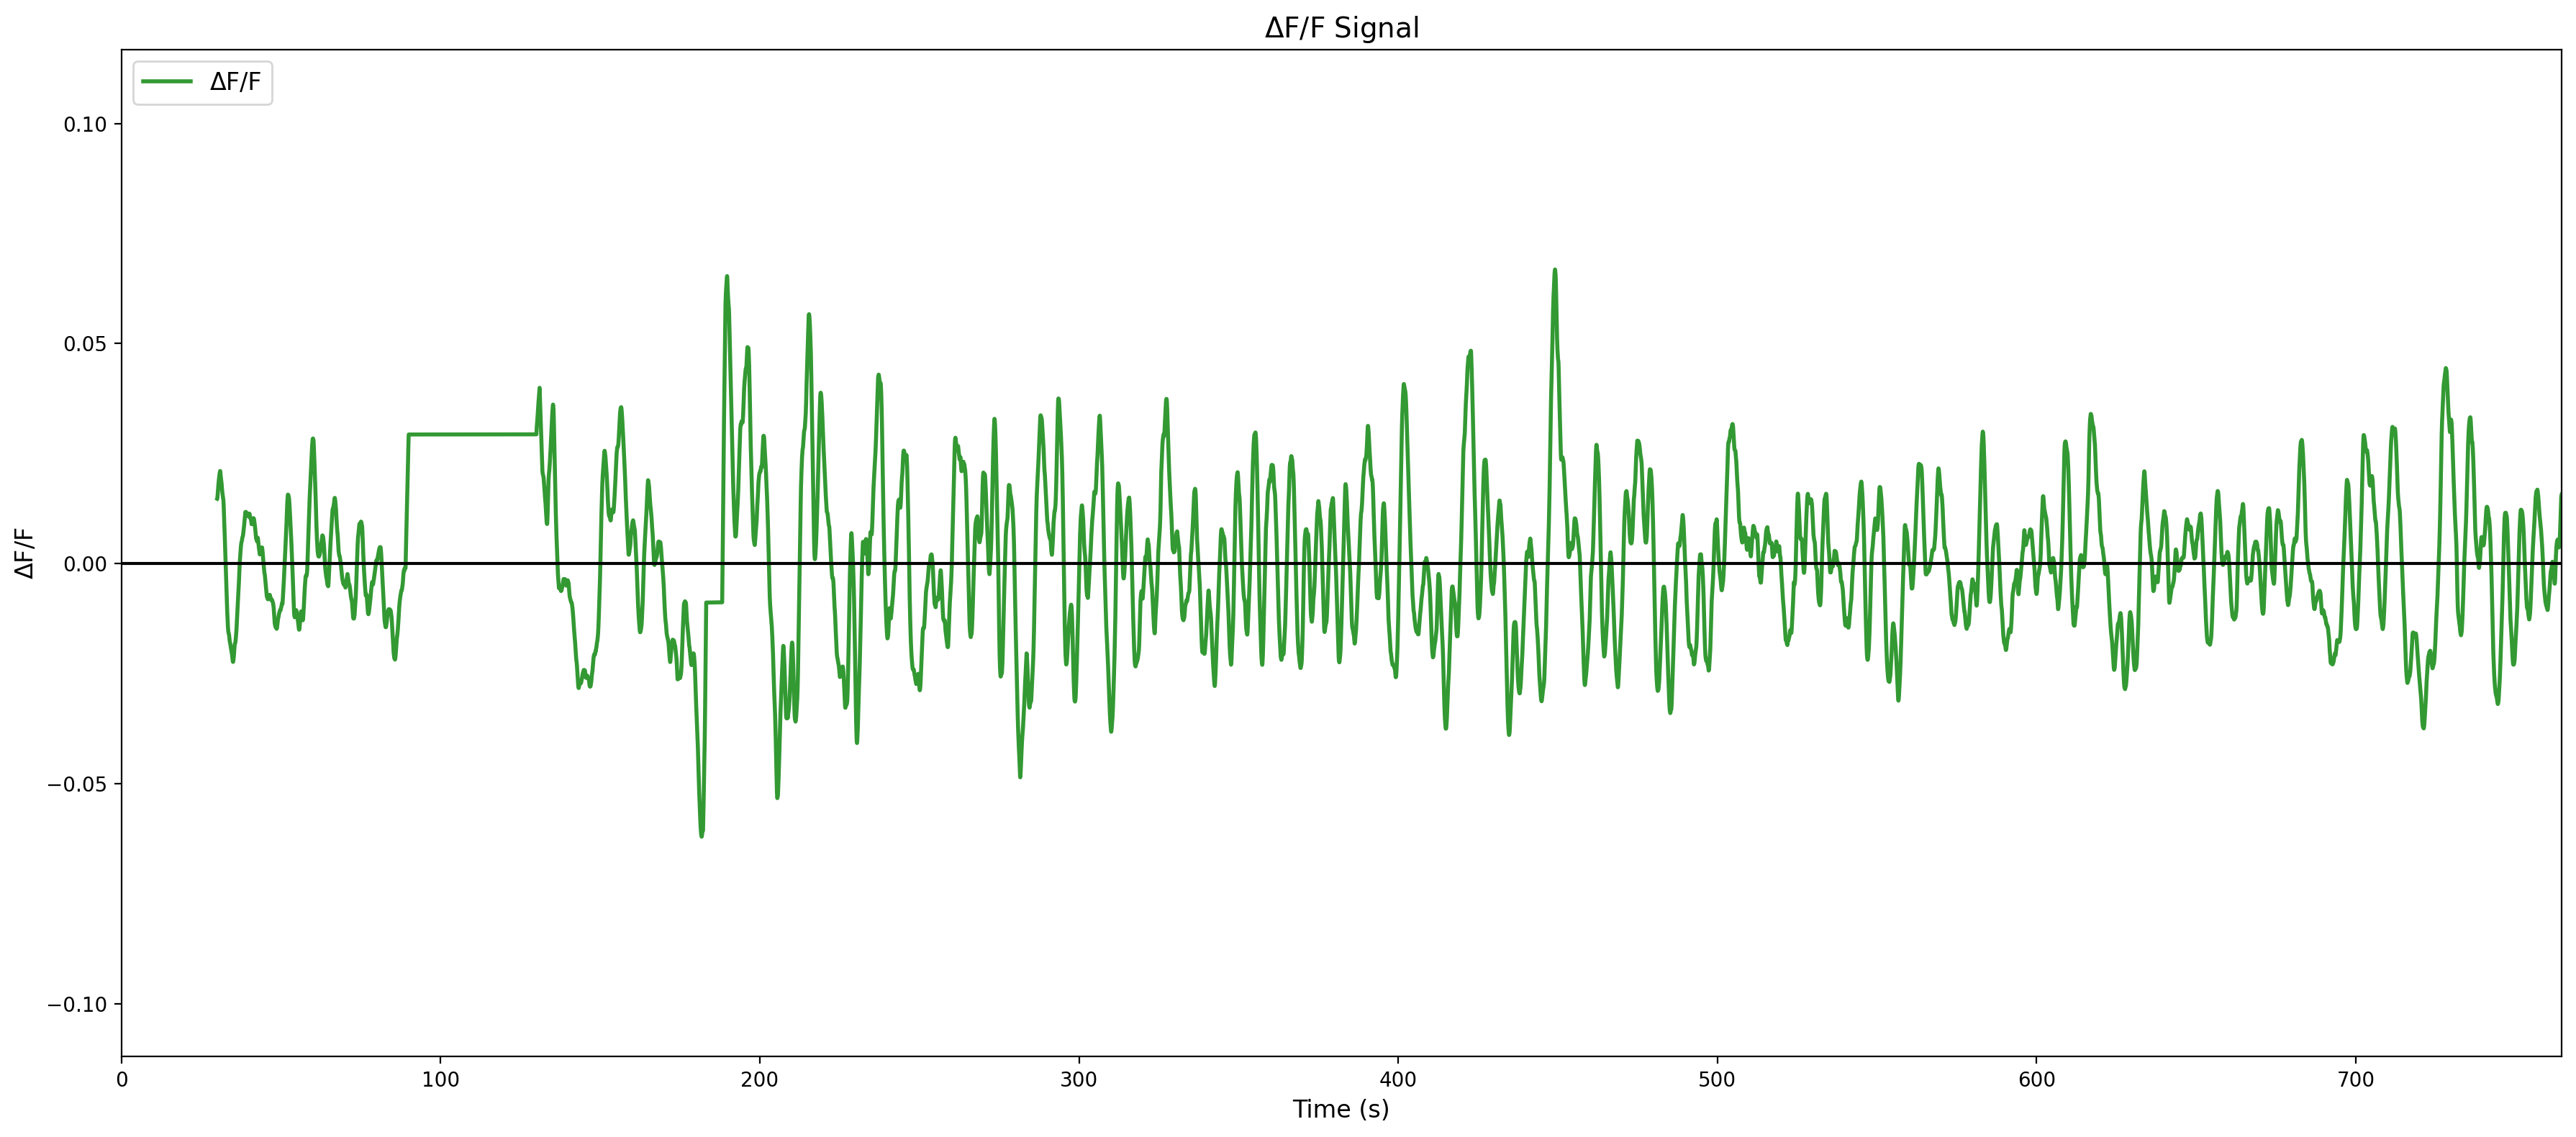

In [22]:
tdt_data_obj.plot_dFF()

In [23]:
tdt_data_obj.compute_zscore()

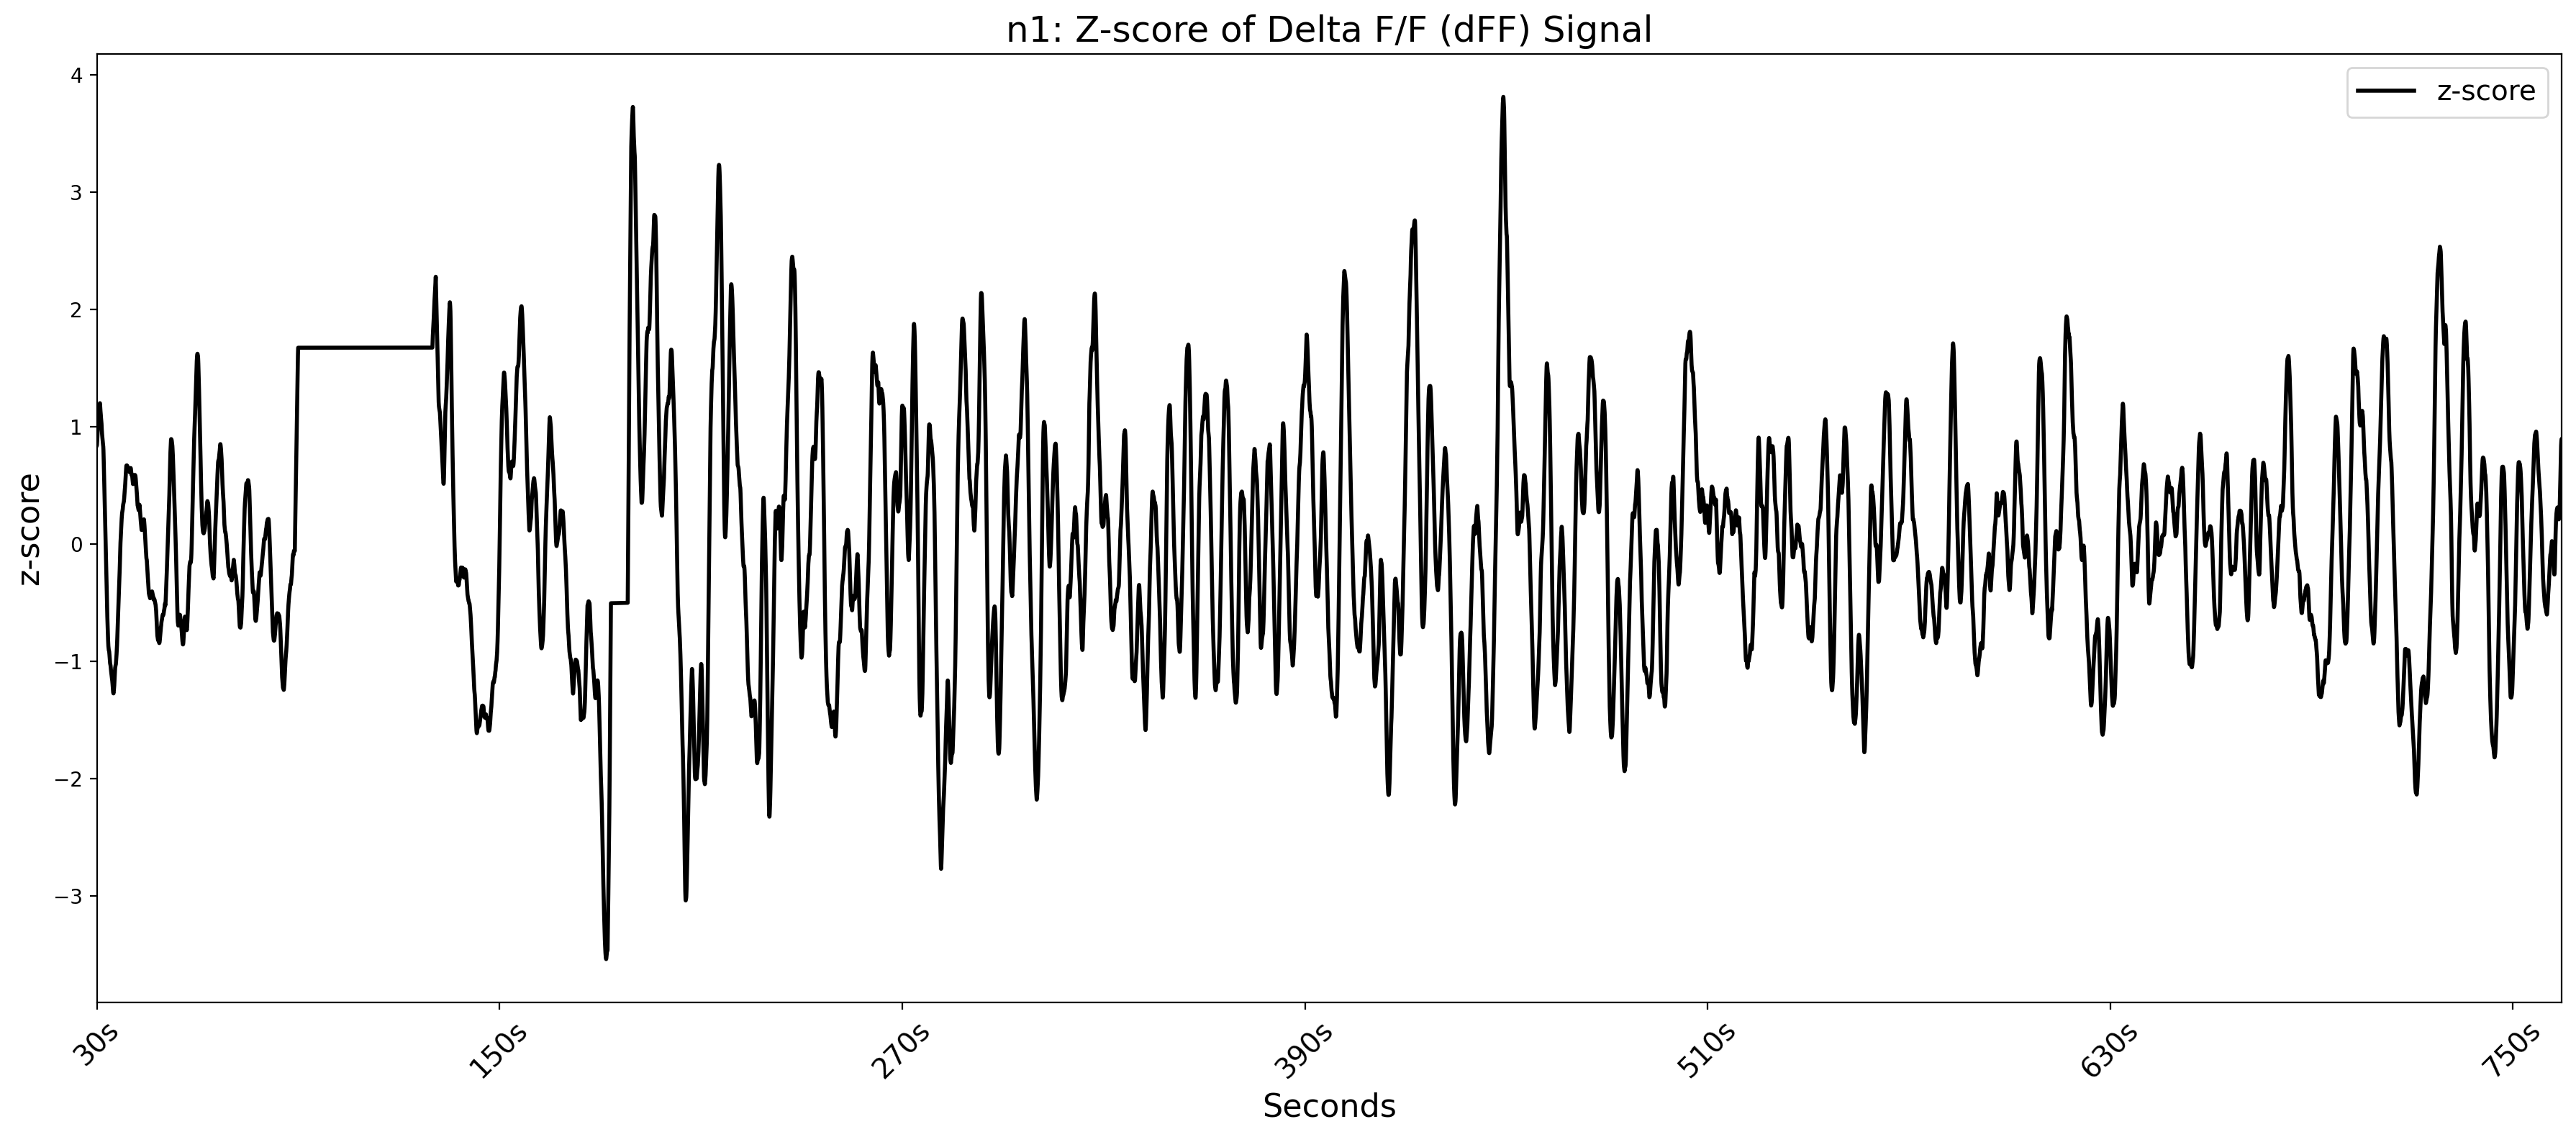

In [24]:
tdt_data_obj.plot_zscore()

## PETH

ValueError: Behavior event 'Investigation' not found in behaviors.

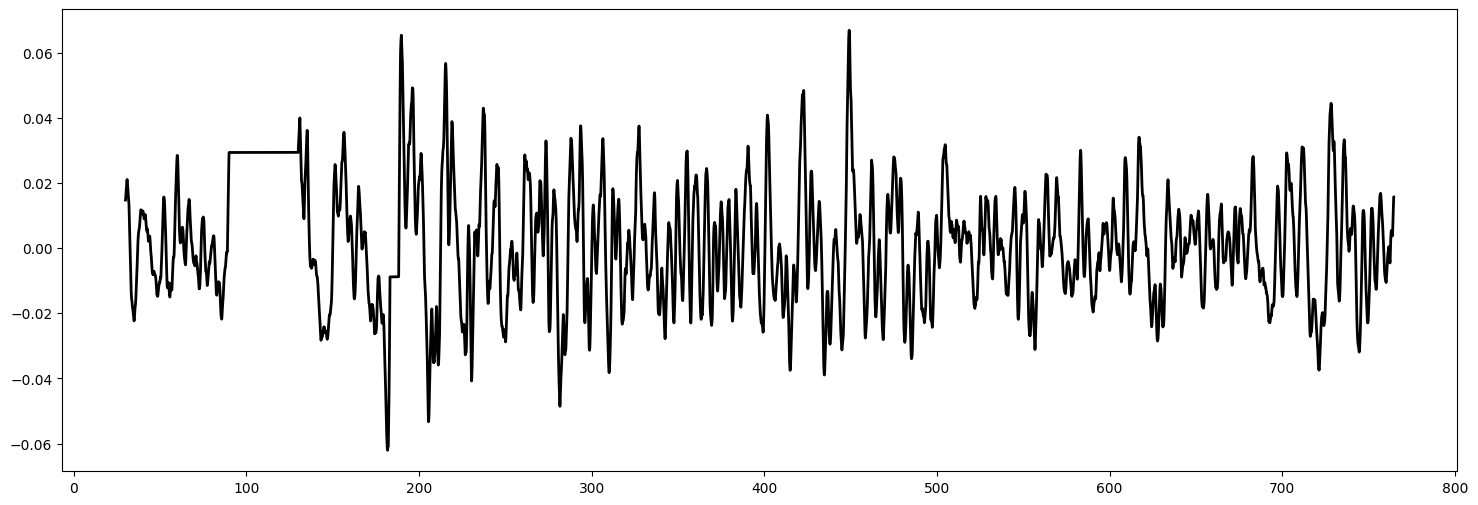

In [25]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [22]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

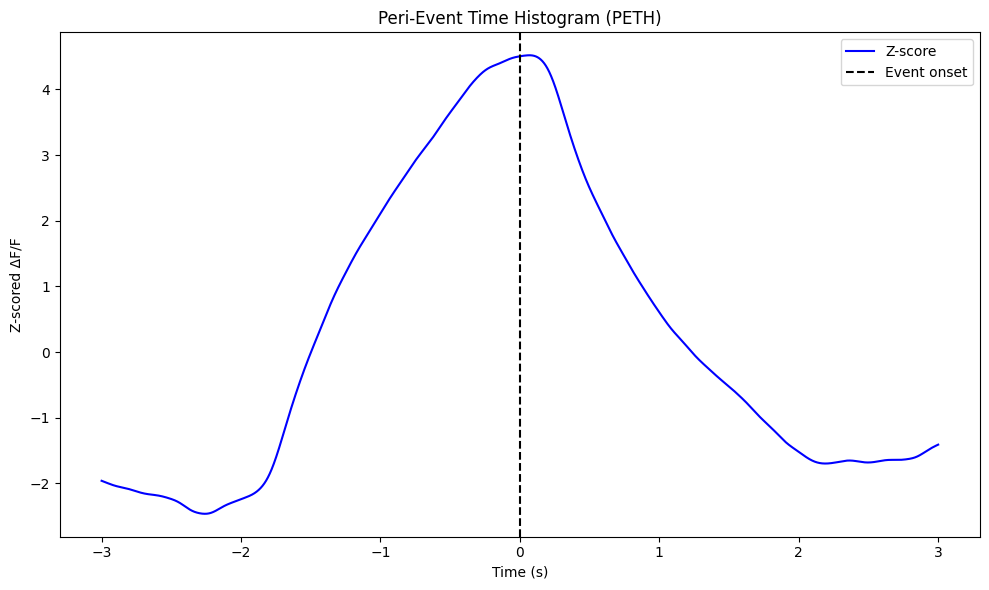

In [26]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [27]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

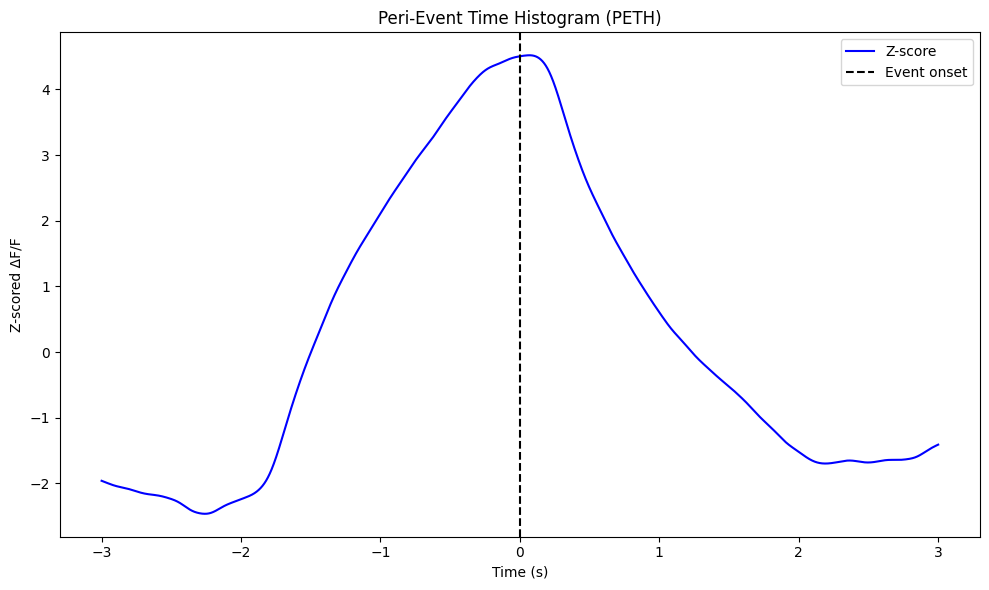

In [28]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [24]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [25]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict